In [532]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [533]:
Len = 10
FD = 100

In [534]:
def compute_fft(arr):
    answer = np.zeros(len(arr), dtype=complex)
    if len(arr) <= 1:
        return arr
    
    half_len = len(arr)//2
    
    even = compute_fft(arr[0::2])
    odd =  compute_fft(arr[1::2])
    
    values = [np.exp(-2j*np.pi*k/len(arr)) for k in range(half_len)]
    
    answer = [even[k] + values[k]*odd[k] for k in range(half_len)] + \
        [even[k] - values[k]*odd[k] for k in range(half_len)]
    
    return answer

In [535]:
def fft(arr):
    N = len(arr)
    deg = int(math.log(N, 2))
    if (2 ** deg < N):
        arr.resize(2 ** (deg + 1), refcheck=False)
    else:
        arr.resize(2 ** deg, refcheck=False)

    return compute_fft(arr)
    

In [536]:
def inversed_fft(arr):
    answer = np.zeros(len(arr), dtype=complex)

    for x in range(len(arr)):
        for y in range(len(arr)):
            answer[x] += arr[y]*np.exp(2j*np.pi*x*y*np.divide(1, len(arr), dtype=complex))
        answer[x] = np.divide(answer[x], len(arr), dtype=complex)

    return answer

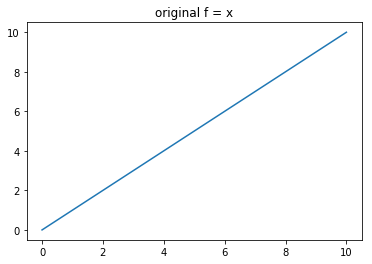

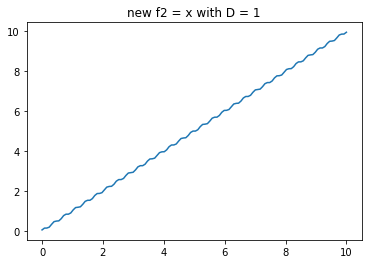

In [537]:
# x
deg = int(math.log(FD, 2))
if (2 ** deg < FD):
    new_FD = 2 ** (deg + 1)
else:
    new_FD = 2 ** deg

x = np.linspace(0, Len, new_FD)
f = x
fourier = fft(f)

D = 1
for i in range(D):
    fourier[FD - i - 1] = 0

f2 = inversed_fft(fourier)

x2 = np.linspace(0, Len, len(fourier))
plt.figure(1)
plt.plot(x2, f)
plt.title('original f = x')

plt.figure(2)
plt.plot(x2, f2)
plt.title('new f2 = x with D = 1')

plt.show()

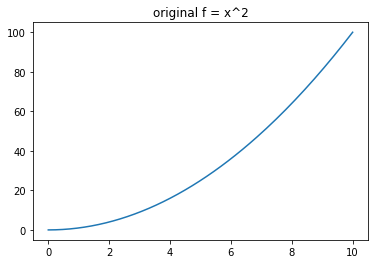

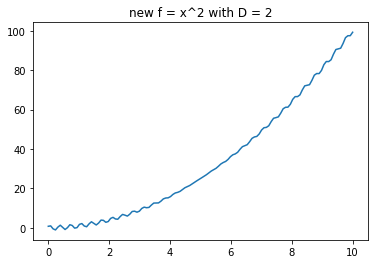

In [538]:
# x^2
deg = int(math.log(FD, 2))
if (2 ** deg < FD):
    new_FD = 2 ** (deg + 1)
else:
    new_FD = 2 ** deg

x = np.linspace(0, Len, new_FD)
f = x * x
fourier = fft(f)

D = 2
for i in range(D):
    fourier[FD - i - 1] = 0

f2 = inversed_fft(fourier)

plt.figure(1)
plt.plot(x, f)
plt.title('original f = x^2')

plt.figure(2)
plt.plot(x, f2)
plt.title('new f = x^2 with D = 2')

plt.show()

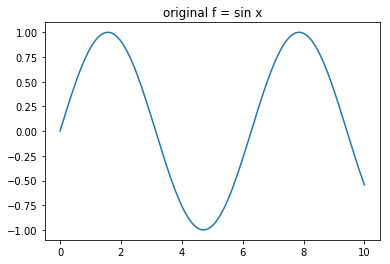

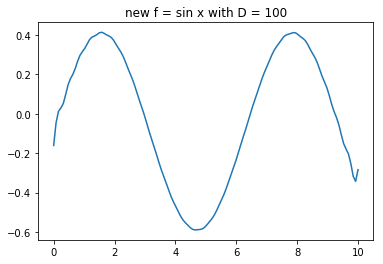

In [539]:
# sin x
deg = int(math.log(FD, 2))
if (2 ** deg < FD):
    new_FD = 2 ** (deg + 1)
else:
    new_FD = 2 ** deg

x = np.linspace(0, Len, new_FD)
f = np.sin(x)
fourier = fft(f)

D = 100
for i in range(D):
    fourier[FD - i - 1] = 0

f2 = inversed_fft(fourier)

plt.figure(1)
plt.plot(x, f)
plt.title('original f = sin x')

plt.figure(2)
plt.plot(x, f2)
plt.title('new f = sin x with D = 100')

plt.show()

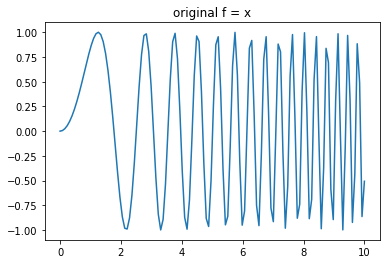

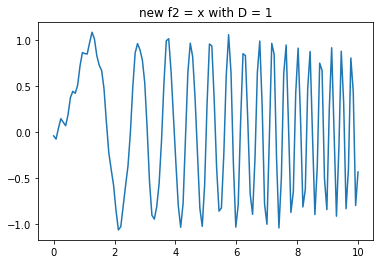

In [540]:
# sin x^2 
deg = int(math.log(FD, 2))
if (2 ** deg < FD):
    new_FD = 2 ** (deg + 1)
else:
    new_FD = 2 ** deg

x = np.linspace(0, Len, new_FD)
f = np.sin(x * x)
fourier = fft(f)

D = 1
for i in range(D):
    fourier[FD - i - 1] = 0

f2 = inversed_fft(fourier)

plt.figure(1)
plt.plot(x, f)
plt.title('original f = x')

plt.figure(2)
plt.plot(x, f2)
plt.title('new f2 = x with D = 1')

plt.show()

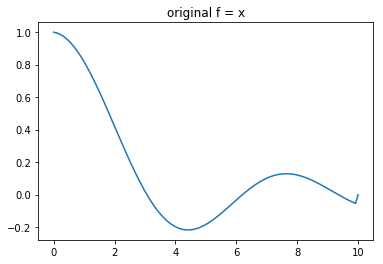

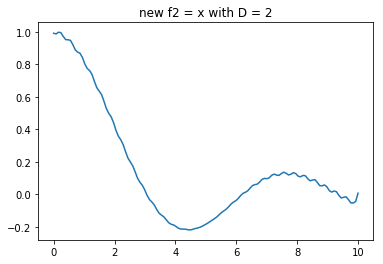

In [541]:
# (sin x) / x

deg = int(math.log(FD, 2))
if (2 ** deg < FD):
    new_FD = 2 ** (deg + 1)
else:
    new_FD = 2 ** deg

x = np.linspace(0, Len, new_FD)
x = x[(x != 0)]
f = np.sin(x)/x
fourier = fft(f)

D = 2
for i in range(D):
    fourier[FD - i - 1] = 0

f2 = inversed_fft(fourier)

x2 = np.linspace(0, Len, len(f2))
plt.figure(1)
plt.plot(x2, f)
plt.title('original f = x')

plt.figure(2)
plt.plot(x2, f2)
plt.title('new f2 = x with D = 2')

plt.show()